In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
#Import SFO precip data
prcp = pd.read_csv('SFO_NOAA_data.csv')

In [23]:
#Drop lat, long, and elevation columns, transform DATE column to datetime 
prcp = prcp.drop(columns=['LATITUDE','LONGITUDE', 'ELEVATION'])
prcp['DATE'] = pd.to_datetime(prcp['DATE'])

In [31]:
#Create month and year columns 
prcp['month'] = pd.DatetimeIndex(prcp['DATE']).month
prcp['year'] = pd.DatetimeIndex(prcp['DATE']).year

In [32]:
#Select May data
may = prcp.loc[prcp['month'] == 5]

In [65]:
#Calulate may cumulative precip per year
may_rain = may.groupby(by='year').sum()

In [68]:
#Calulate average may precip
ave_may = may_rain['PRCP'].mean()
ave_may

0.3458108108108109

In [69]:
#Select days in may with rainfall greater than 0.1"
one_tenth = may.loc[may['PRCP'] > 0.1]

In [112]:
one_tenth

,STATION,NAME,DATE,PRCP,month,year
326,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",1946-05-25,0.12,5,1946
665,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",1947-05-26,0.12,5,1947
670,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",1947-05-31,0.11,5,1947
1015,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",1948-05-20,0.25,5,1948
1374,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",1949-05-14,0.19,5,1949
1378,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",1949-05-18,0.27,5,1949
2093,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",1951-05-03,0.44,5,1951
2463,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",1952-05-07,0.24,5,1952
3920,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",1956-05-03,0.20,5,1956
3925,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",1956-05-08,0.14,5,1956


In [70]:
#Calulate average days when raining
annual = one_tenth.groupby(by="year").count()
annual['PRCP'].mean()

2.085714285714286

In [106]:
#Number of days in may with rain greater than 0.1
annual['PRCP'].sum()

73

In [71]:
#Number of years with May rain greater than 0.1
annual['PRCP'].count()

35

In [72]:
#Number of years with 1 "greater than 0.1 rainfaull" day in May
days_one = annual.loc[annual['PRCP'] == 1]
days_one['PRCP'].count()

15

In [105]:
#Number of years with more than "greater than 0.1 rainfaull" day in May
days_one = annual.loc[annual['PRCP'] > 1]
days_one['PRCP'].count()

20

Text(0.5, 0, 'Days in May with precip > 0.1 in')

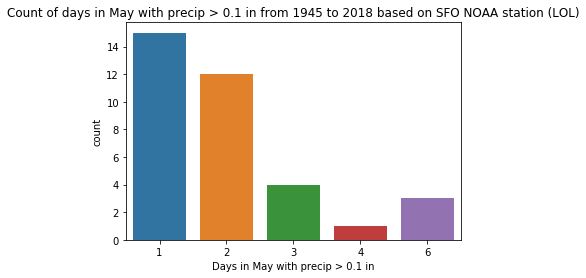

In [111]:
#Countplot SORRY FOR BEING LAZY AND NOT INCLUDING A "ZERO" PLOT FOR "5"
sns.countplot(annual['PRCP']).set_title('Count of days in May with precip > 0.1 \
in from 1945 to 2018 based on SFO NOAA station (LOL)')
plt.xlabel("Days in May with precip > 0.1 in")

In [95]:
annual

,STATION,NAME,DATE,PRCP,month
year,,,,,
1946,1,1,1,1,1
1947,2,2,2,2,2
1948,1,1,1,1,1
1949,2,2,2,2,2
1951,1,1,1,1,1
1952,1,1,1,1,1
1956,2,2,2,2,2
1957,6,6,6,6,6
1958,2,2,2,2,2
